원본 커널 : https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

### 간단 설명
- to develop a machine learning model that can **predict the poverty level of households** using both individual and household characteristics. 
- The training set has one additional column , `Target`, which represents the poverty level on a 1-4 scale and is the label for the competition.

<br>

### Target Label
- The `Target` vlaues represent poverty levels as follows:
    - 1 = extreme poverty
    - 2 = moderate poverty
    - 3 = vulerable households
    - 4 = non vulerable households
    
### 주요 feature 설명
- `id` : 개인 pk
- `idhogar` : household pk
- `parentesco1` : head of household 
- `Target` : the label


### Roadmap
- 문제 이해하기
- EDA
- Feature engineering
- 여러 baseline 머신러닝 모델 비교하기
- 복잡한 머신러닝 모델 구현
- 선택한 모델 최적화하기
- 예측하기
- 결론


In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [102]:
path = 'C:/Users/user/Desktop/kaggle_data/04. costa-rican-household-poverty-prediction/'

In [103]:
pd.options.display.max_columns = 150

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


- 데이터 타입이 numeric인 변수가 130개
    - boolean 변수 이거나 서열 변수

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


<br>

### Integer columns

In [106]:
train.select_dtypes(np.int64).nunique()[:10]

hacdor     2
rooms     11
hacapo     2
v14a       2
refrig     2
v18q       2
r4h1       6
r4h2       9
r4h3       9
r4m1       6
dtype: int64

In [107]:
train.select_dtypes(np.int64).nunique().value_counts()

2     101
13      5
97      3
22      3
11      3
10      3
9       3
7       3
6       2
4       2
14      1
1       1
dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

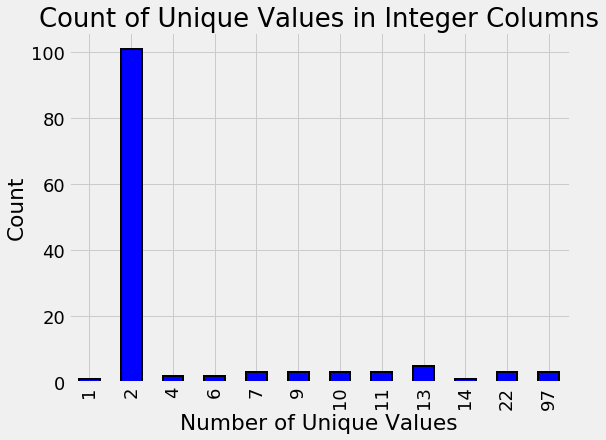

In [108]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue',
                                                                            figsize = (8,6),
                                                                            edgecolor = 'k',
                                                                            linewidth = 2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')
# 2개씩 갖고 있는 변수가 가장 많음

### 결과 해석 알아둘것

- `value_counts() == 2` 가 제일 많은 이유가 boolean 변수가 많기 때문

<br>

### Float Columns

- 가난의 수준을 색으로 나타내기 위해서 `OrderedDict` 사용

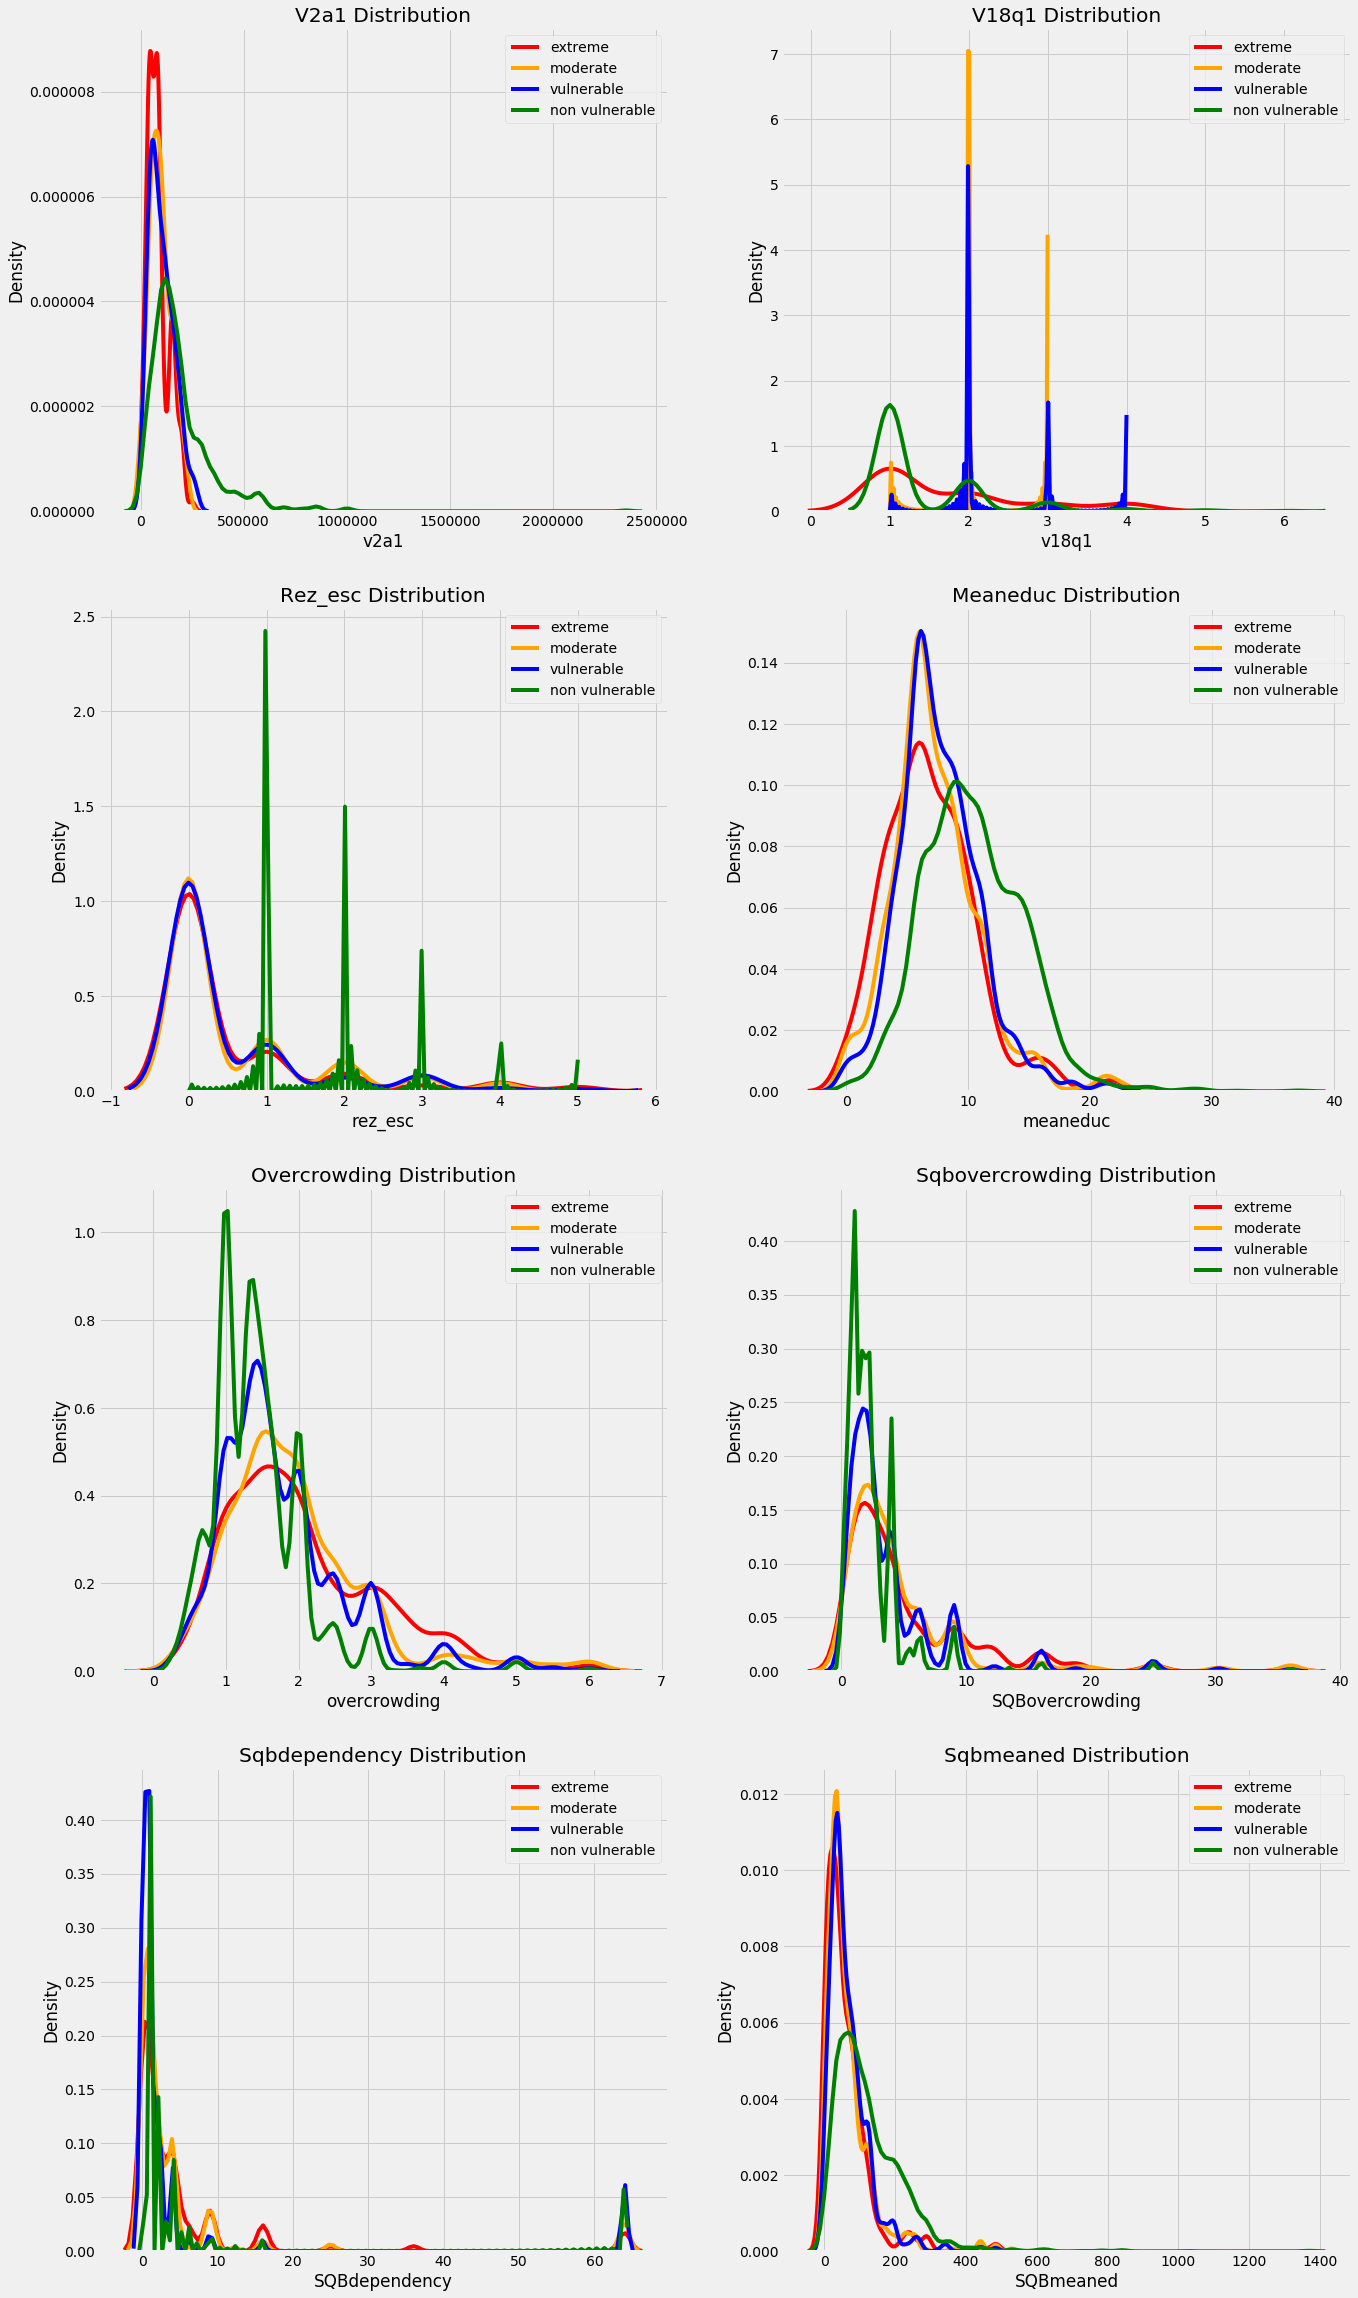

In [109]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# 색 mapping
colors = OrderedDict( {1: 'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

for i , col in enumerate(train.select_dtypes('float')):
    if i<=8:
        ax = plt.subplot(4,2, i+1)
    
        for poverty_level, color in colors.items():
            sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    # Target 별로 뽑아내서 밀도 함수 그리기
                        ax = ax, color = color, label = poverty_mapping[poverty_level])
        
            plt.title(f'{col.capitalize()} Distribution') # string format
            plt.xlabel(f'{col}')
            plt.ylabel('Density')
        
plt.subplots_adjust(top = 2)
        

In [110]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [111]:
colors

OrderedDict([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [112]:
colors.items()

odict_items([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [113]:
train.select_dtypes('float').columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

In [114]:
train.select_dtypes('float').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


<br>

### Object Columns

In [115]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


- `dependency` : dependency rate, (# 19 미만 + # 64 이상) / (# 19-64)
- `edjefe` : 남자 교육 기간
- `edjefa` : 여자 교육 기간

<br>

### 오류 나서 함수 새롭게 만들었음

In [116]:
def non(df, col):
    df.loc[df[col] == 'no', col] = np.float64(0)
    df.loc[df[col] == 'yes', col] = np.float64(1)
    
    df[col] = df[col].astype(np.float64)

In [117]:
non(train, 'dependency')
non(train, 'edjefa')
non(train, 'edjefe')
non(test, 'dependency')
non(test, 'edjefa')
non(test, 'edjefe')

In [118]:
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [119]:
colors.items()

odict_items([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [120]:

poverty_mapping[1]

'extreme'

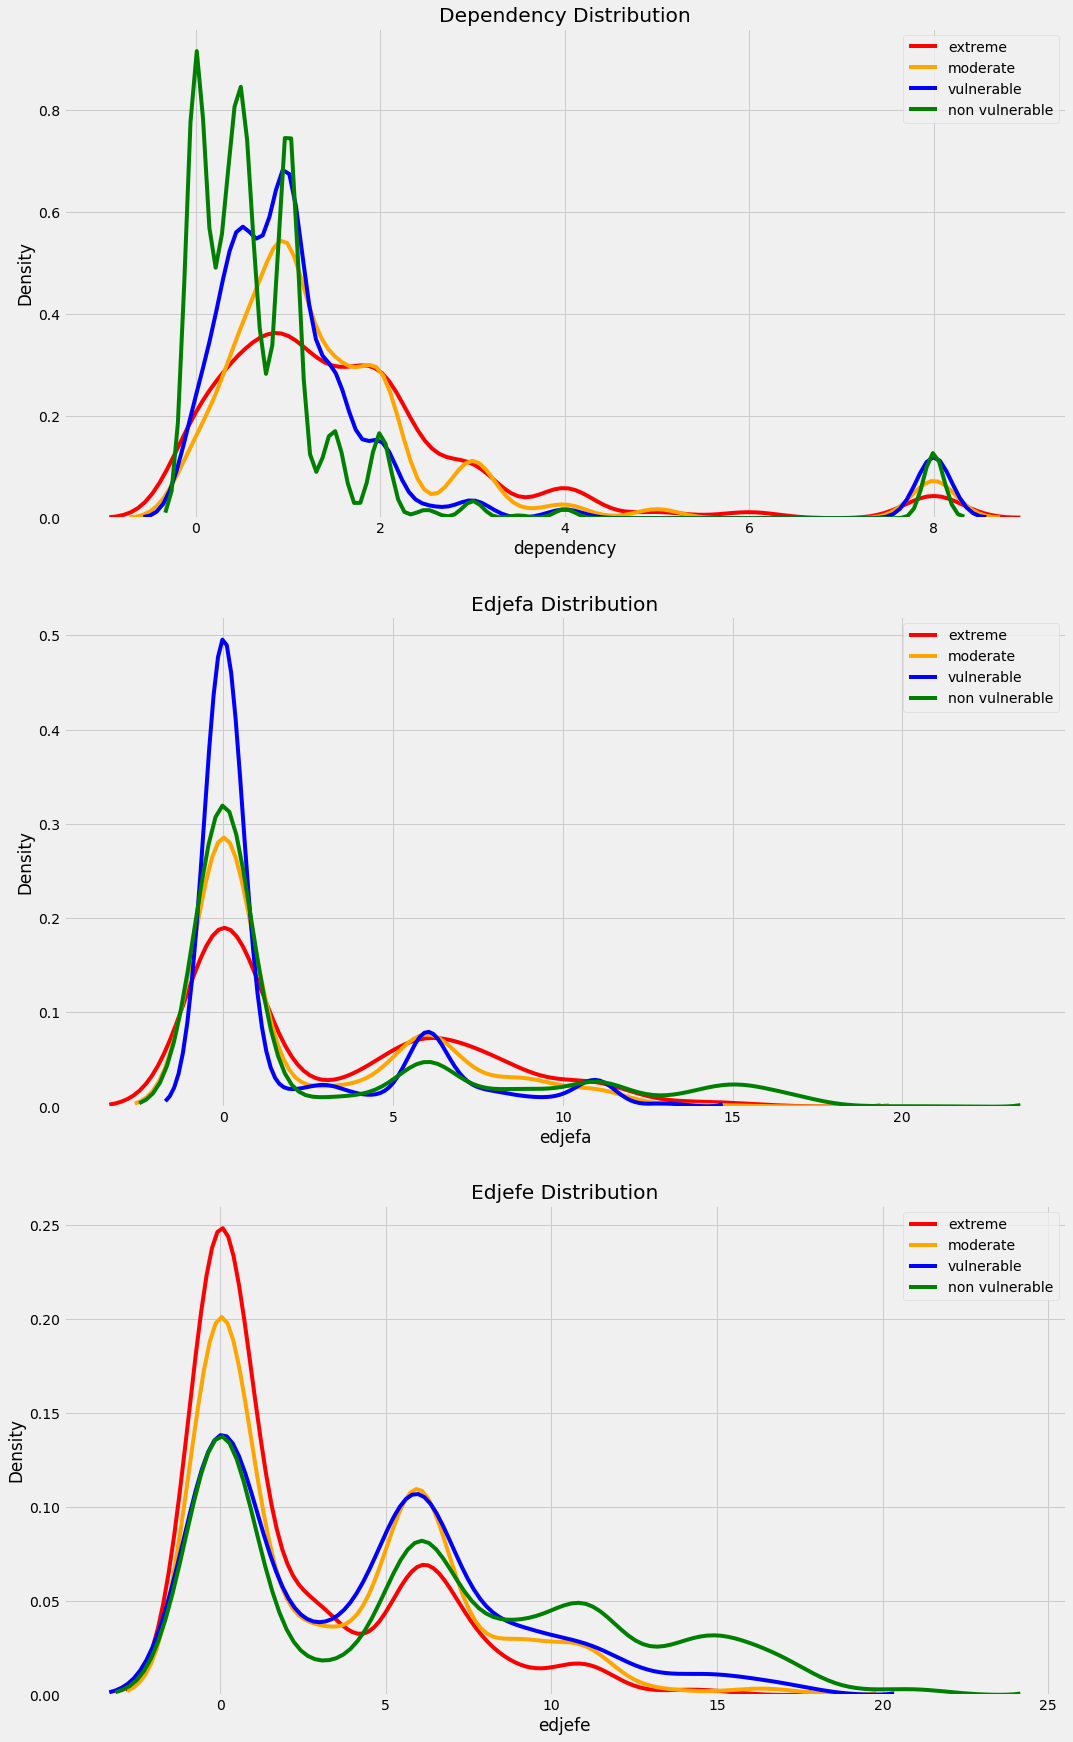

In [121]:
plt.figure(figsize = (16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution')
    
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    
plt.subplots_adjust(top = 2)

In [122]:
test['Target'] = np.nan
data =train.append(test, ignore_index = True)

<br>

### Exploring Label Distribution

- the head of household 인 사람들 (parentesco1 == 1) 을 subset 해서 가난에 대해 labeling 하기
- 각 가정마다 더 정확한 라벨링을 하기 위해서

Text(0.5, 1.0, 'Poverty Level Breakdown')

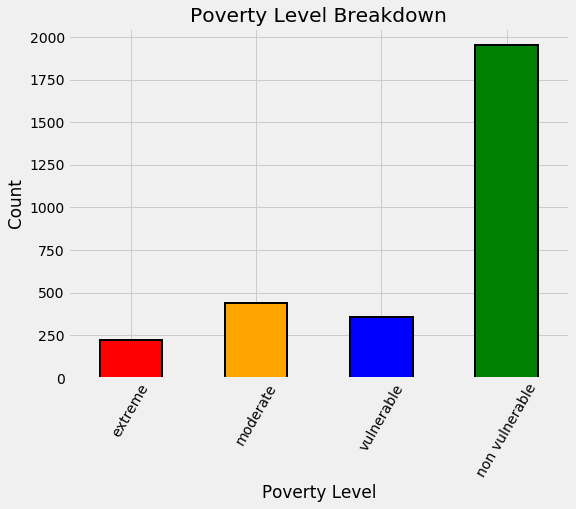

In [123]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6),
                     color = colors.values(),
                     edgecolor = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x - 1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown')

- 불균형 클래스를 다루고 있음(weighted F1 대신에 macro F1 사용하는 이유)
    - oversampling 을 통해 해결

In [124]:
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

In [125]:
train_labels.head()

,Target,idhogar
0,4.0,21eb7fcc1
1,4.0,0e5d7a658
2,4.0,2c7317ea8
5,4.0,2b58d945f
8,4.0,d6dae86b7


<br>

### 잘못된 라벨링 해결하기

- 똑같은 가정에 있는 개인들이 다른 가난 수준을 갖고 있음
- 가장의 가난 수준이 true label이라고 생각하고 문제 해결

#### 문제 해결
- household 별로 groupby 한 후, Target 의 수가 1이 아닌 경우는 잘못된 라벨링

In [126]:
(train.groupby('idhogar')['Target'].count() == 1).sum() # 이거랑은 왜 다른 결과값일까

398

In [127]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('동일하지 않은 경우: ', len(not_equal))

동일하지 않은 경우:  85


In [128]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [129]:
not_equal.index[0]

# 3명만 제대로된 라벨링이고 나머지는 X

'0172ab1d9'

<br>

### Families without Heads of Household

In [130]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()


# head 없는 가정 찾기
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('head 없는 가정 {}'.format(households_no_head['idhogar'].nunique()))

head 없는 가정 15


In [131]:
# Find households without a head and where labels are different

households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

print('가장 없는데 label 다른 경우는 {}'.format(sum(households_no_head_equal == False)))

가장 없는데 label 다른 경우는 0


<br>

### Correct Errors

- 가장 없는 가정과 다른 poverty levels 를 갖고 있는 member 수정하기

In [132]:
# not_equal : 다른 가난 수준 갖고 있음 
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('가족과 똑같은 Target 을 갖고 있지 않은 멤버 수 {}'.format(len(not_equal)))

가족과 똑같은 Target 을 갖고 있지 않은 멤버 수 0


<br>

### Missing Variables

In [133]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0 : 'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


<br>

#### Missing values - v18q1

- v18q1 : 태블릿 수
- v18q : 태블릿 보유 여부
    

In [134]:
def plot_value_counts(df, col, heads_only = False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                edgecolor = 'k',
                                                linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

- heads = 가장 data

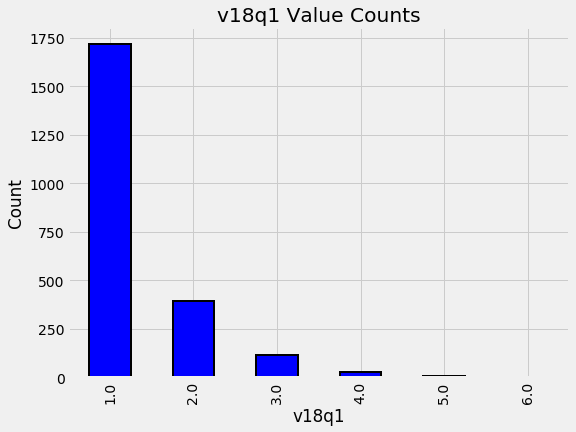

In [135]:
plot_value_counts(heads, 'v18q1')

In [136]:
pd.DataFrame(heads.groupby('v18q')['v18q1'].apply(lambda x : x.isnull().sum()))

,v18q1
v18q,
0,8044
1,0


- 태블릿을 갖고 있지 않은 가장 중 nan 값은 없음

In [137]:
data['v18q1'] = data['v18q1'].fillna(0)

<br>

#### Missing values - v2a1

- `v2a1` : 월세
- `tipovivi_` : 집 보유 여부

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

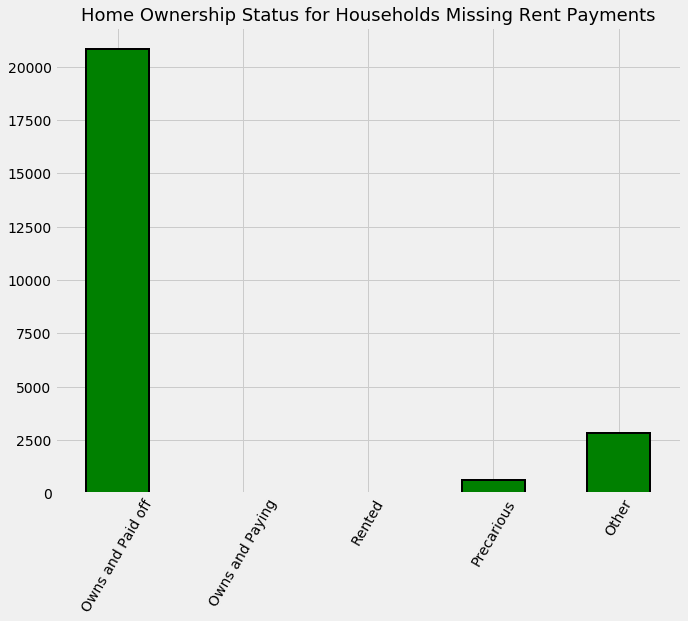

In [138]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                             color = 'green', edgecolor = 'k', linewidth = 2)

plt.xticks([0, 1, 2, 3, 4],
          ['Owns and Paid off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)

plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

In [139]:
data.filter(like = 'tipo').head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


#### tipo 변수 설명

- tipovivi1, =1 own and fully paid house

- tipovivi2, "=1 own,  paying in installments"

- tipovivi3, =1 rented

- tipovivi4, =1 precarious

- tipovivi5, "=1 other(assigned,  borrowed)"


In [140]:
data.loc[data['tipovivi1'] == 1, 'v2a1'] = 0

data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

<br>

#### Missing values - rez_esc

- 졸업 후 기간


In [141]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

- 최대값은 17, 이것보다 나이 든 사람은 not in school
- `rez_esc` 는 7과 19 사이의 개인들을 정의한 변수이다.
- 이 범위 보다 어리거나 나이든 사람은 0으로 설정해야 한다.

In [142]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [143]:
data.loc[((data['age'] > 19) | (data['age']< 7)) & (data['rez_esc'].isnull()), 'rez_esc' ] = 0

data['rez_esc-missing'] = data['rez_esc'].isnull()

<br>

#### 이상치 해결

In [144]:
data.rez_esc.value_counts()

0.0     30894
1.0       728
2.0       336
3.0       174
4.0        80
5.0        39
99.0        1
Name: rez_esc, dtype: int64

In [145]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

<br>

### Plot Two categorical Variables

- 범주형 변수들 간의 상관관계를 보여주기 위해서, scatterplots, faceted bar plots, boxplot 사용

In [146]:
def plot_categoricals(x, y, data, annotate = True):
    
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x : 'raw_count'})
    
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    counts = counts.rename(columns = {x : 'normalized_count'}).reset_index()
    
    counts['percent'] = 100 * counts['normalized_count']
    
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
               s = 100 *np.sqrt(counts['raw_count']), marker = 'o', alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        for i , row in counts.iterrows():
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                              row[y] - (0.15 / counts[y].nunique())),
                        color = 'navy',
                        s = f"{round(row['percent'], 1)}%")
                
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
                         
                         
                         
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
                         
    msizes = list(range(sqr_min, sqr_max, int((sqr_max - sqr_min) / 5)))
                         
    markers = []
                         
    for size in msizes:
            markers.append(plt.scatter([], [], s = 100*size, label = f'{int(round(np.square(size) / 100) * 100)}' ,
                                      color = 'lightgreen', alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
                         
    plt.legend(handles = markers , title = 'Counts', labelspacing = 3, 
              handletextpad = 2, fontsize = 16, loc = (1.10, 0.19))
                         
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                xy = (0, 1), xycoords = 'figure points', size= 10)
                         
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()),
             counts[x].max() + ( 6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (6 / counts[y].nunique()),
             counts[y].max() + ( 6 / counts[y].nunique())))
                         
                         
    plt.grid(None)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} vs {x}')
            

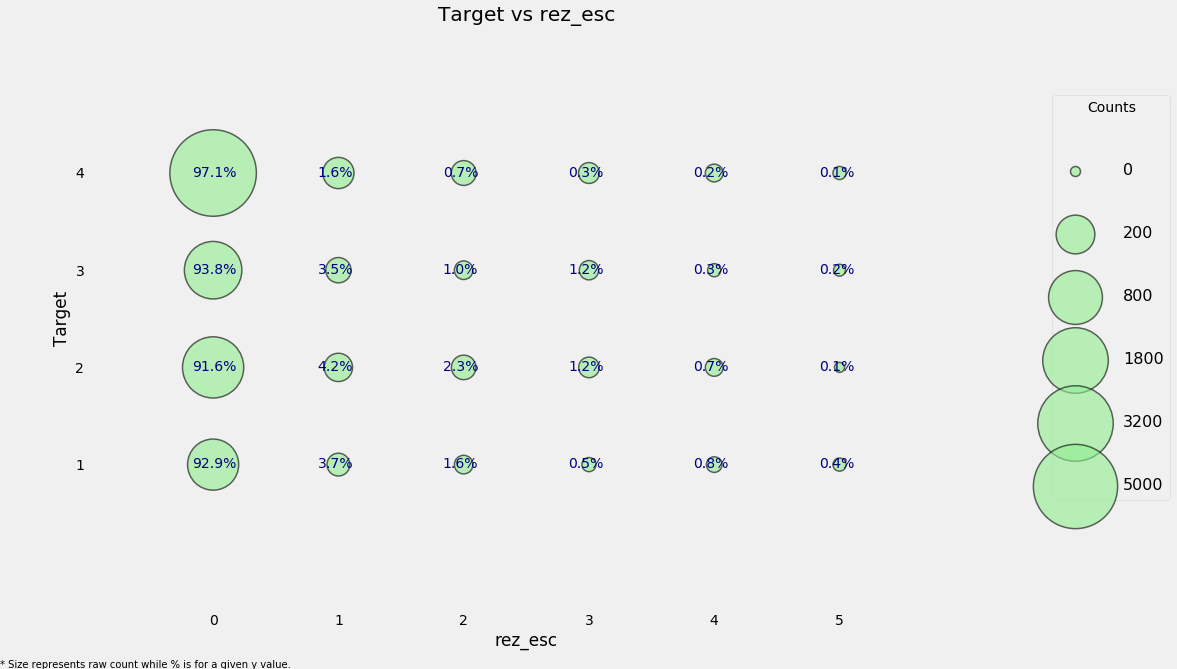

In [147]:
plot_categoricals('rez_esc', 'Target', data)

- marker 의 크기는 raw count 를 의미
- Target == 1 일 때, 93 % 는 교육을 받은 경험이 없다
- Targe == 1 일때, 0.4 % 만이 5년 교육을 받았다

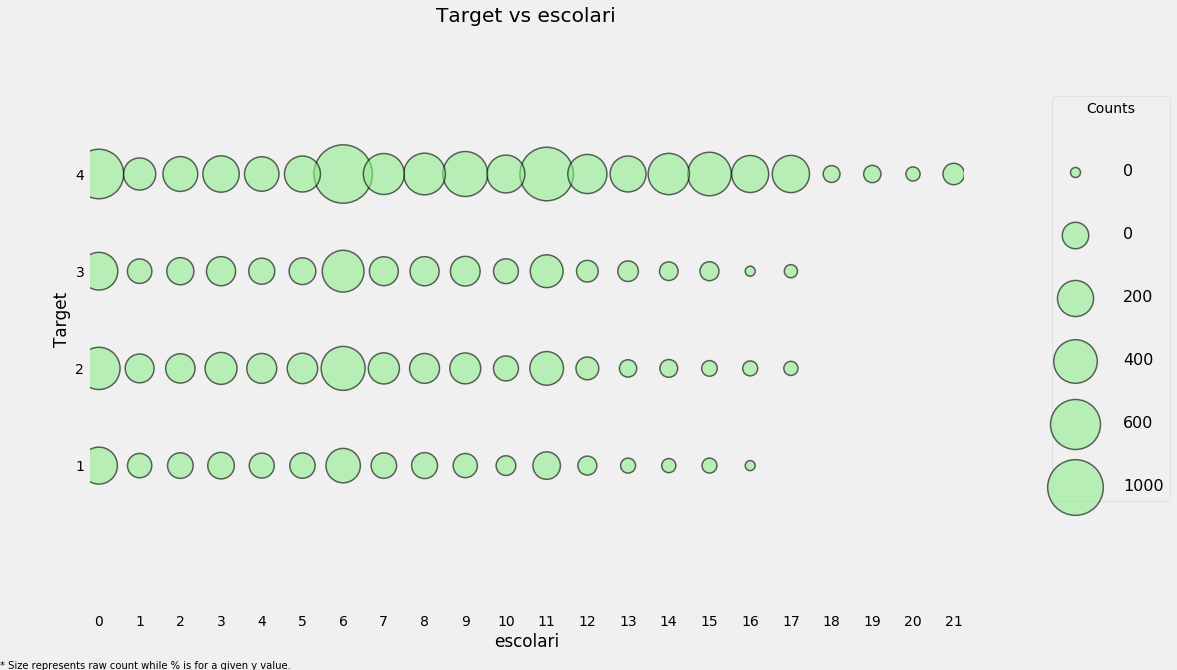

In [148]:
plot_categoricals('escolari', 'Target', data, annotate = False)

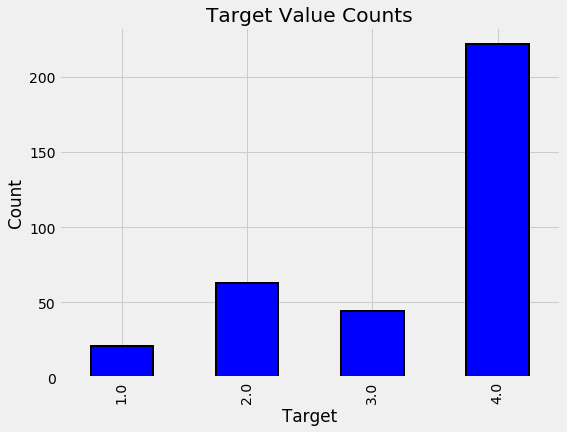

In [149]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

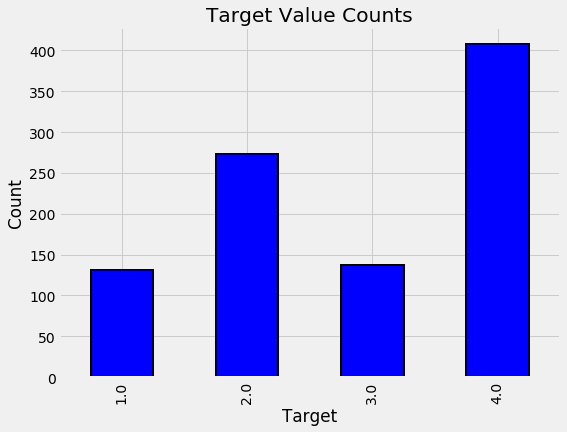

In [150]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

<br>

### Feature Engineering


#### process
- household level 과 individual level 로 나누기
- ind level data 에 대해서 적합한 함수 찾기
    - 서열변수는 통계적 메소드 적용
- ind 과 household level 합치기


#### 변수 카테고리 정의
1. Individual Variables: these are characteristics of each individual rather than the household
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering
2. Household variables
    - Boolean: Yes or No
    - Ordered Discrete: Integers with an ordering
    - Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features

In [151]:
id_ = ['Id', 'idhogar', 'Target']

In [152]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [153]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_count = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [154]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [155]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_count + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


Text(0.5, 1.0, 'Squared Age vs Age')

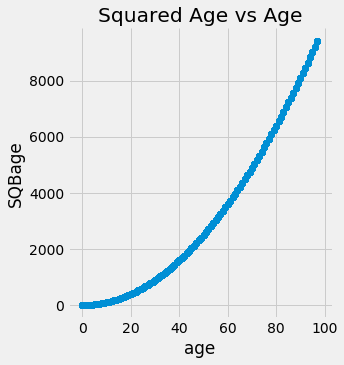

In [156]:
sns.lmplot('age', 'SQBage', data= data, fit_reg = False)
plt.title('Squared Age vs Age')

- age 와 sqredage 는 높은 상관관계가 있어서, 하나만 사용해도 무방
- 지워야 함


In [157]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

<br>

### Id Variables

#### HouseHold Level Variables
- subset 하기 > 가장 
- 상관관계 파악한 후, 높은 상관관계를 갖는 변수 중 하나 제거하기

In [158]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

In [159]:
corr_matrix = heads.corr()


# np.triu 상상감 행렬 upper triangle 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [160]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


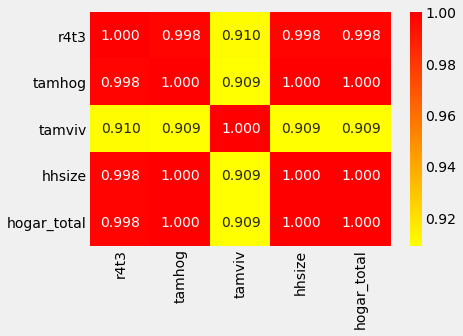

In [161]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
           annot = True, cmap = plt.cm.autumn_r, fmt = '.3f')

- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- hhsize, household size
- hogar_total, # of total individuals in the household

<br>

#### 상관관계 결과
- `tamhog` 와 `hhsize` / `hhsize` 와 `hogar_total` 는 높은 상관관계를 갖고 있음
- `r4r3` 와 `hhsize`

In [162]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Household size vs number of persons living in the household')

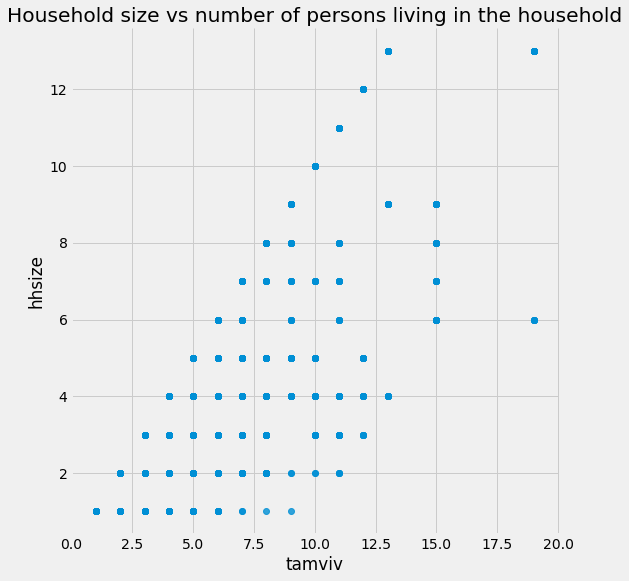

In [163]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg = False, size = 8)

plt.title('Household size vs number of persons living in the household')

- 가족 구성원 수 보다 people iving in the household 의 수가 더 많다

- 이 2가지 변수 사이의 차이를 새로운 변수로 구성할 수 있음

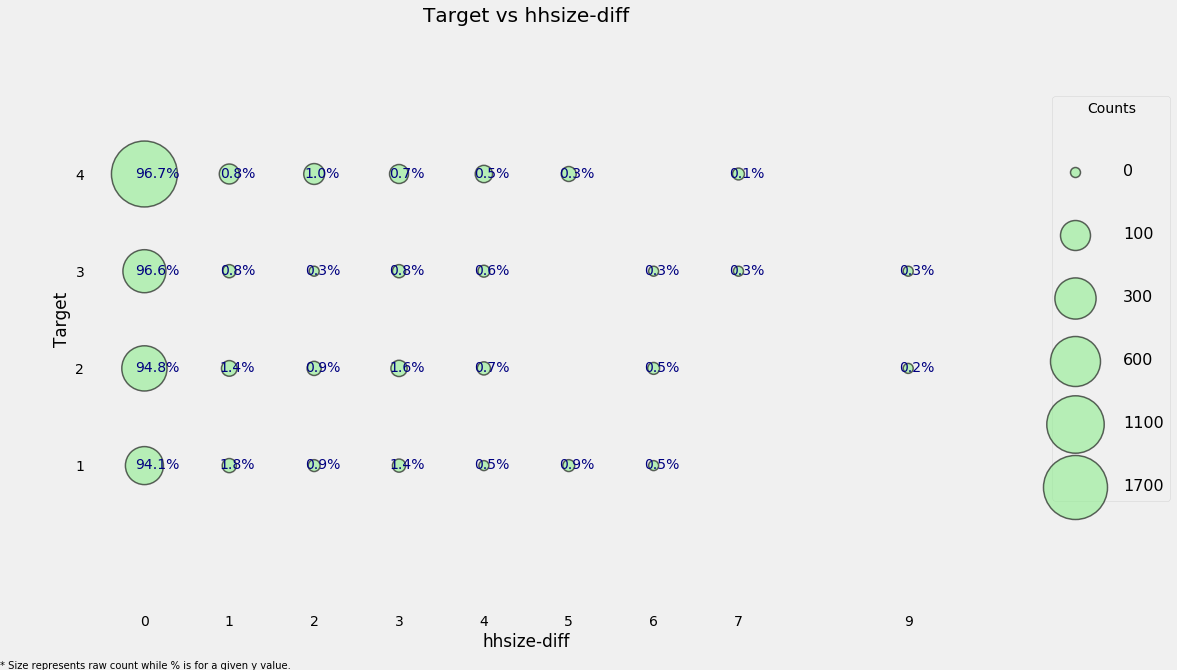

In [164]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [165]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


- 집의 전기 출처 ; public, coopele
- 이 2가지 옵션 중에서 전기를 얻지 않는다면, `noelec` 전기를 사용하지 않거나 `planpri` 공장에서 get


**전기 서열 변수 만들기**
- 0: No electricity
- 1: Electricity from cooperative
- 2: Electricity from CNFL, ICA, ESPH/JASEC
- 3: Electricity from private plant

In [166]:
heads[['public', 'coopele', 'noelec', 'planpri']].head()

,public,coopele,noelec,planpri
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
5,1,0,0,0
8,1,0,0,0


In [167]:
elec = [] 

# iterrows() / iloc /loc 와 비슷하게 사용됨
for i , row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0) # 전기 사용 X
    elif row['coopele'] == 1:
        elec.append(1) # 협력체로 부터
    elif row['public'] == 1:
        elec.append(2) # 공공체
    elif row['planpri'] == 1:
        elec.append(3) # 공장
    else:
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
    

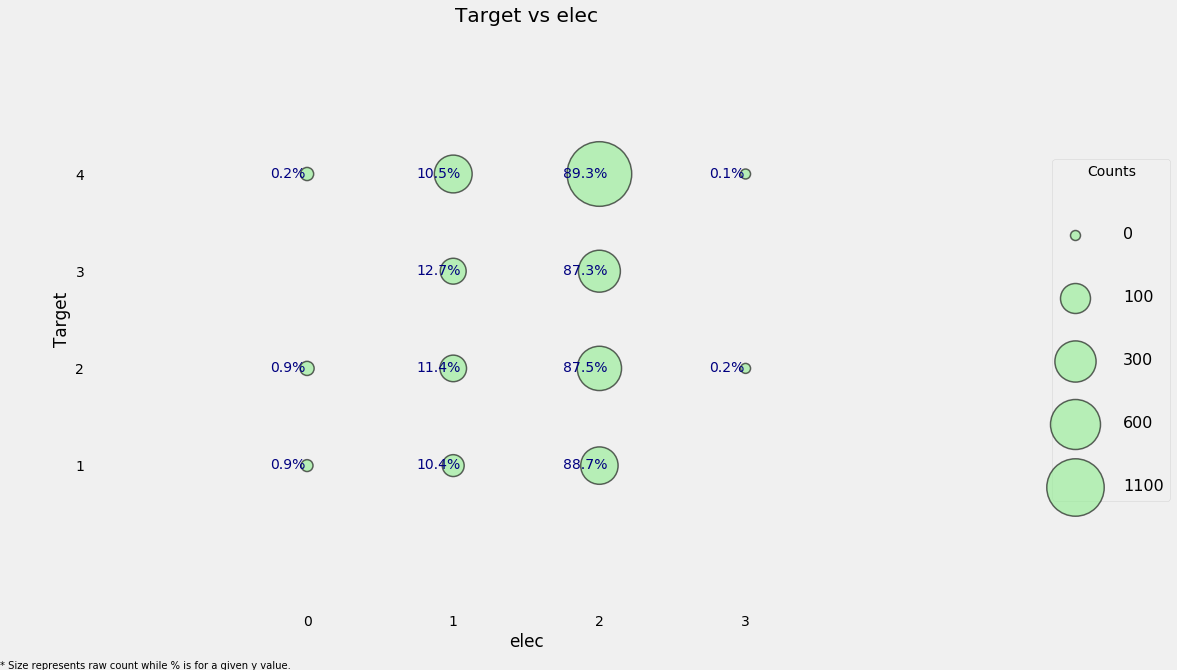

In [168]:
plot_categoricals('elec', 'Target', heads)

<br>

- `area2`
    - 시골에 있는 경우
- `urban` 과 겹치기 때문에 제거

In [169]:
heads = heads.drop(columns = 'area2')

pd.DataFrame(heads.groupby('area1')['Target'].value_counts(normalize = True))

Target
area1 Target          
0     4.0     0.582249
      2.0     0.176331
      3.0     0.147929
      1.0     0.093491
1     4.0     0.687030
      2.0     0.137688
      3.0     0.108083
      1.0     0.067199

- 도심 지역에 거주 하는 사람들이 가난률이 더 낮다

<br>

### Creating Ordinal Variables

- walls, roof, floor 이 각각의 칼럼을 갖고 있음
- bad < regular < good 의 형태로

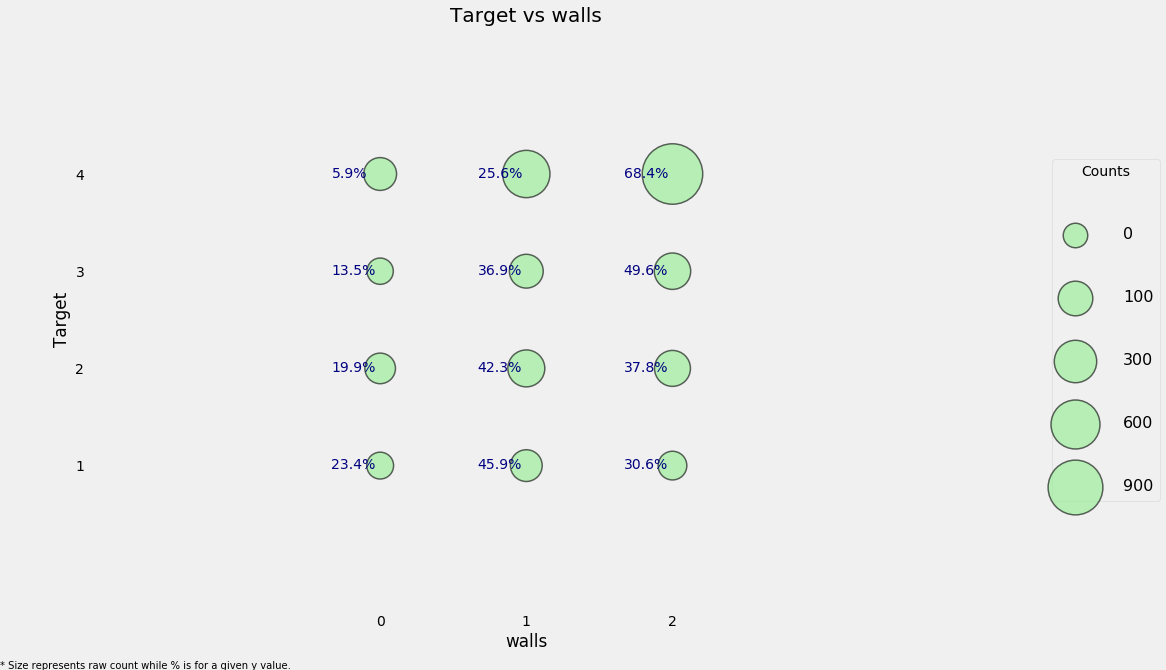

In [170]:
# wall 서열 변수
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

plot_categoricals('walls', 'Target', heads)

In [172]:
# 지붕 서열 변수

heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis = 1)

heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor 서열 변수
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis = 1)


<br>

### Feature Construction


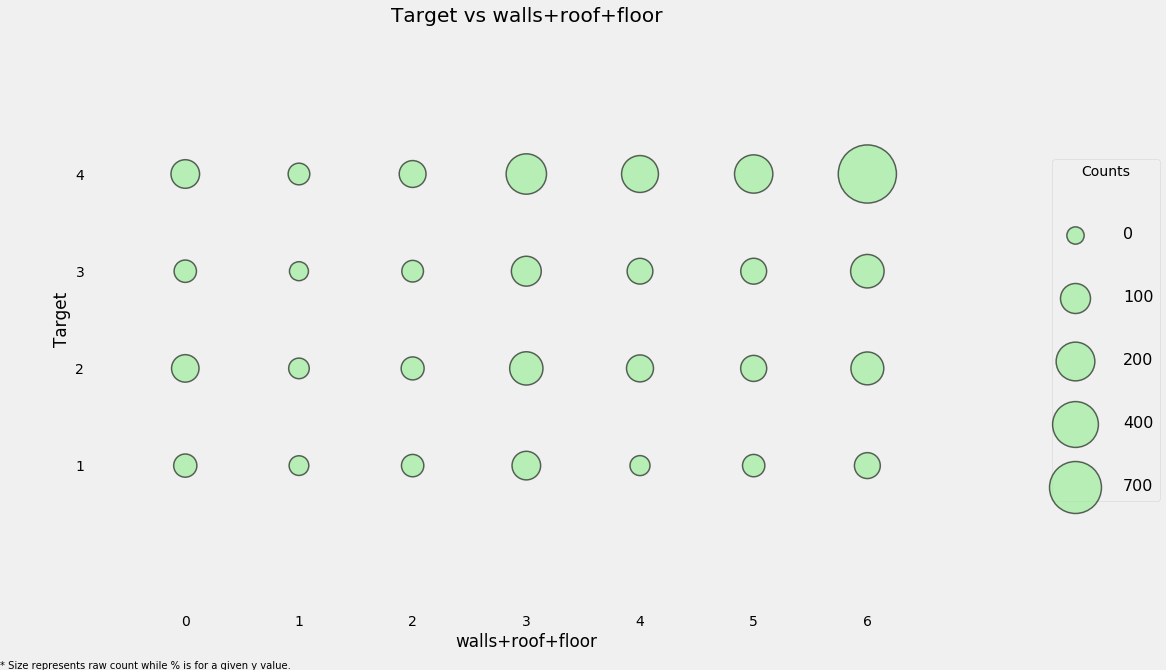

In [174]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

- 가장 가난한 사람이 집의 quality 가 가장 높다 ; 독특한 특성

In [175]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target':'Normalized Count'}).reset_index()

counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


In [177]:
pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).head()

Target
walls+roof+floor Target          
0                4.0     0.376404
                 2.0     0.320225
                 1.0     0.162921
                 3.0     0.140449
1                4.0     0.323529

<br>

- `warning`
    - 집의 부정적인 가치
    - 화장실, 전기, floor, water service , ceiling X

In [179]:
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))

Text(0.5, 1.0, 'Target vs Waring Variable')

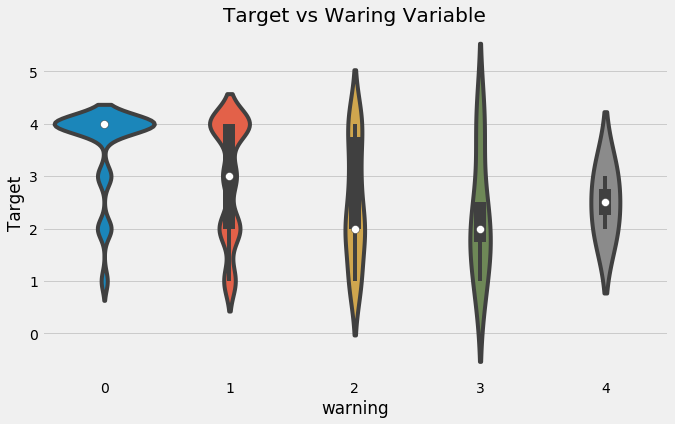

In [180]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y ='Target', data=heads)
plt.title('Target vs Waring Variable')

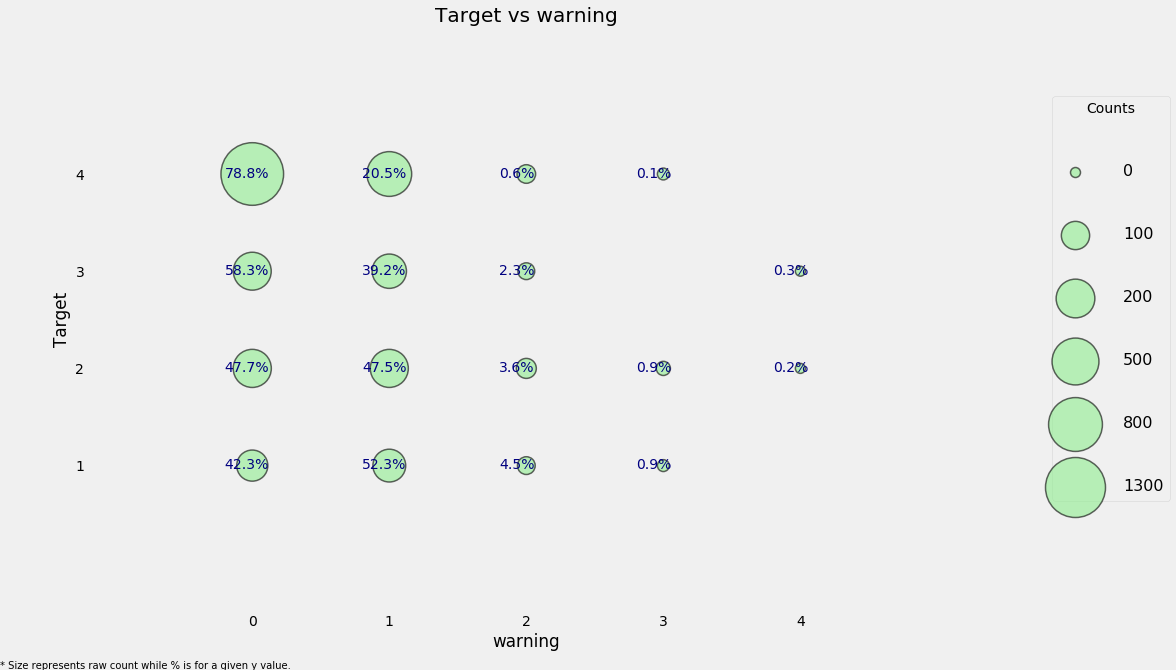

In [181]:
plot_categoricals('warning', 'Target', data= heads)

<br>

- `bonus`
    - 냉장고, 컴퓨터, 태블릿, 텔레비전

Text(0.5, 1.0, 'Target vs Bonus Variable')

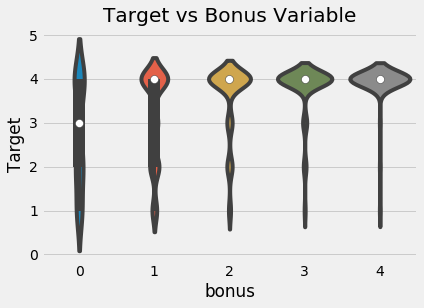

In [185]:
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1']>0) + heads['television'])

sns.violinplot('bonus', 'Target', data= heads, figsize = (10, 6))
plt.title('Target vs Bonus Variable')

<br>

### Per Capita Features

In [186]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

<br>

### Exploring Household Variables

- [피어슨](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D) : 선형 관계 파악
- [스피어만](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A7%8C_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98) : 두 변수 사이의 순위 사이의 통계적 의존도 파악 / 단조 함수 활용

In [187]:
from scipy.stats import spearmanr

In [188]:
def plot_corrs(x, y):
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0, 1]
    
    data =pd.DataFrame({'x': x, 'y':y})
    plt.figure(figsize = (6,4))
    sns.regplot('x', 'y', data= data, fit_reg = False)
    plt.title(f'Spearman: {round(spr, 2)}; Perason: {round(pcr, 2)}')
    

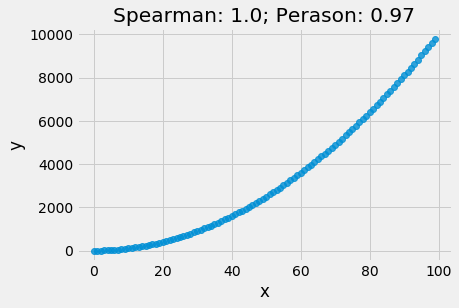

In [189]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

- 스피어만 상관관계 분석은 target 혹은 교육수준과 같은 서열 변수에 적합

In [213]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('음의 상관관계: ')
print(pcorrs.head())

print('\n 양의 상관관계: ')
print(pcorrs.dropna().tail())

음의 상관관계: 
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

 양의 상관관계: 
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


- warning, hogar_nin 등이 늘어날 수록 target 은 줄어듬( target 이 낮아질 수록 가난 수준은 높아짐)
- 즉, warning, hogar_nin 이 늘어나면 가난 수준은 상승

- `hogar_nin` : 0-19 아이의 수
    

In [214]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c)
        
        
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature': feats, 'scorr':scorr, 'pvalue':pvalues}).sort_values('scorr')
scorrs.head()

,feature,scorr,pvalue
97,warning,-0.307326,4.682829e-66
68,dependency,-0.281516,2.792620e-55
85,hogar_nin,-0.236225,5.567218e-39
80,r4t1,-0.219226,1.112230e-33
49,eviv1,-0.217803,2.952571e-33


In [215]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

# p value ; 귀무가설이 맞으 경우, 극단적인 결과를 얻을 확률
# 0.05 보다 작으면 주어진 가설이 맞을 확률이 95% 라는 의미
# 참고 : http://leoslife.com/archives/4352
# p=0.01 이라면
# 귀무가설 하에서 우리가 얻은 통계량이 관찰될 확률이 1% -> 매우 낮다 -> 귀무가설을 반박할 수 있다.

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [216]:
pcorrs.head()

,feature,pcorr
0,warning,-0.301791
1,hogar_nin,-0.266309
2,r4t1,-0.260917
3,overcrowding,-0.234954
4,eviv1,-0.217908


In [217]:
scorrs.head()

,feature,scorr,pvalue
97,warning,-0.307326,4.682829e-66
68,dependency,-0.281516,2.792620e-55
85,hogar_nin,-0.236225,5.567218e-39
80,r4t1,-0.219226,1.112230e-33
49,eviv1,-0.217803,2.952571e-33


In [218]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
77,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
85,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
87,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
97,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [219]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
57,techozinc,0.014357,0.003404,8.528369e-01,0.010954
49,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
88,edjefe,0.235687,0.214736,2.367521e-32,0.020951
66,edjefa,0.052310,0.005114,7.804715e-01,0.047197
17,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


- 가장 큰 차이가 보이는 변수는 `dependency` 

Text(0.5, 1.0, 'Target vs Denpendency')

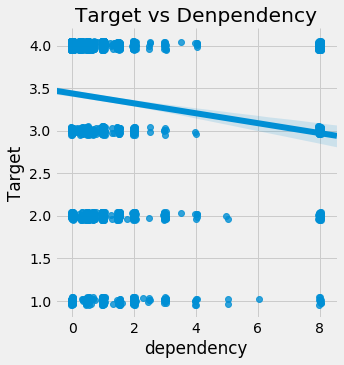

In [220]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05)

plt.title('Target vs Denpendency')

- 약한 음의 관계이긴 해도, 부양 가족이 많을 수록, 가난 수준이 높다

Text(0.5, 1.0, 'Target vs Rooms Per Capita')

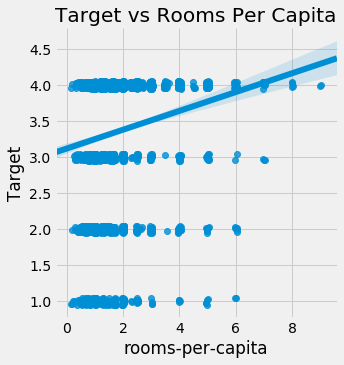

In [221]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05)

plt.title('Target vs Rooms Per Capita')

<br>

### Correlation Heatmap

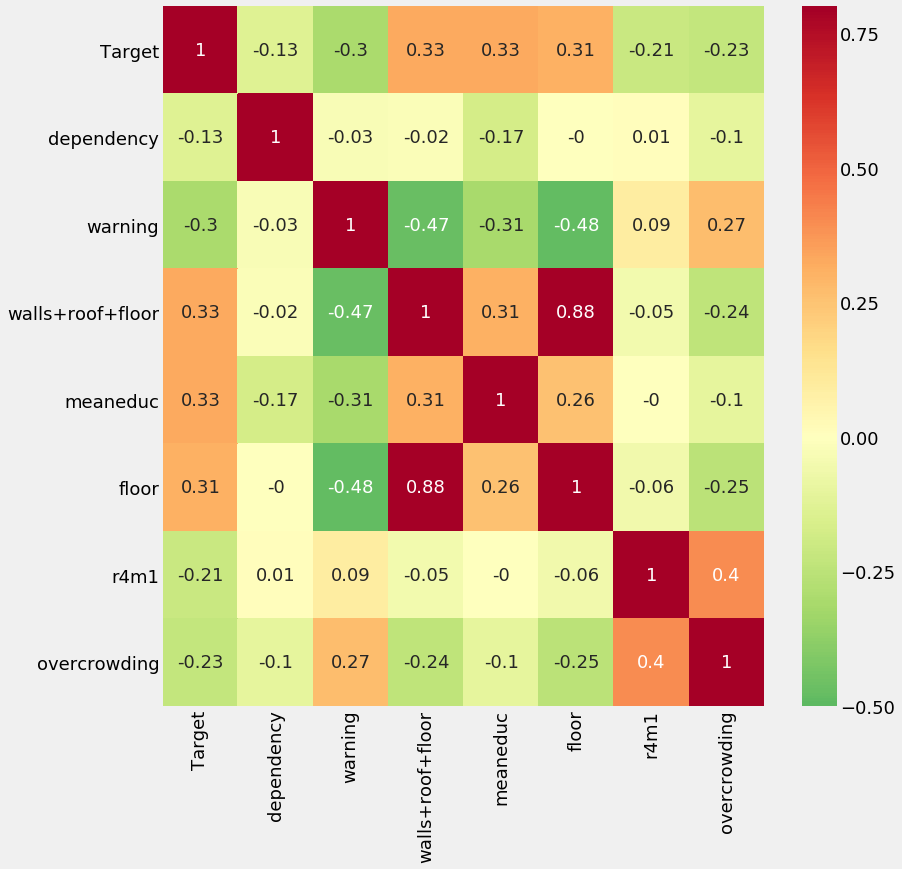

In [222]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']


corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))

sns.heatmap(corr_mat, vmin = - 0.5, vmax = 0.8, center = 0,
           cmap = plt.cm.RdYlGn_r, annot = True)

- `floor` 와 `walls+roof+floor` 은 높은 상관관계가 있다
- 다중공산성 문제가 있을 수 있음

#### Features Plot

Text(0.5, 1.05, 'Feature Plots Colored By Target')

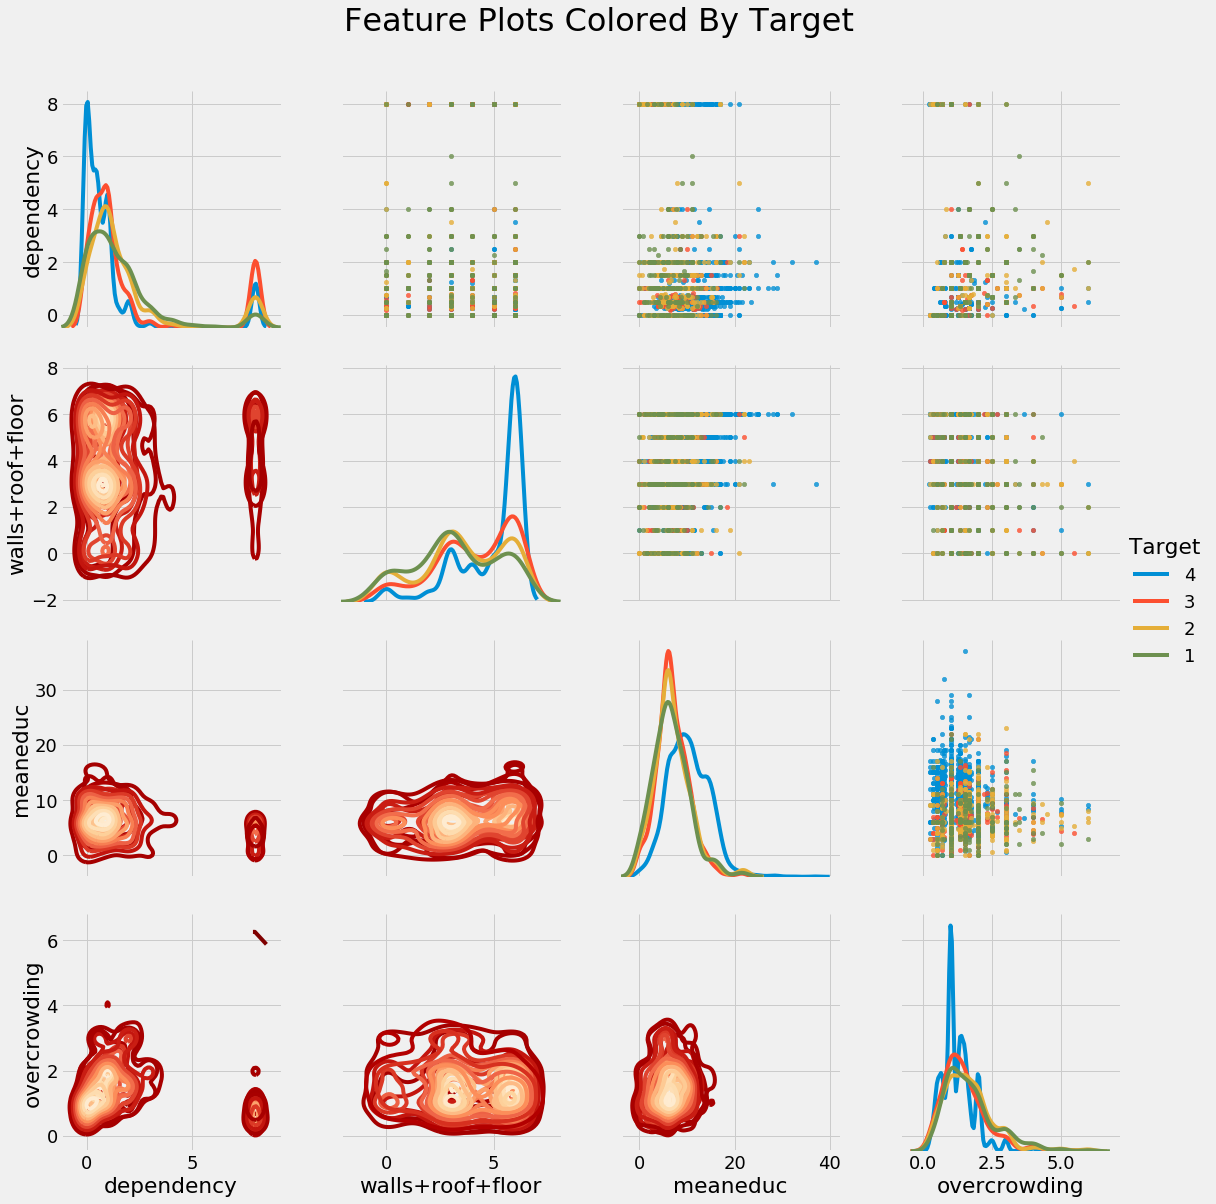

In [224]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey = False, hue = 'Target', hue_order = [4, 3, 2, 1],
                   vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
grid = grid.add_legend()

plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05)

In [225]:
household_feats = list(heads.columns)

<br>

### Individual Level Variables

In [226]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

<br>

#### Redundant Individual Variables

In [227]:
corr_matrix = ind.corr()

# 상삼각행렬
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))

to_drop =[column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [229]:
ind = ind.drop(columns = 'male')

<br>

#### 서열 변수

- `instlevel_` : 교육 양
    - `instlevel9` : 교육 X

In [241]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


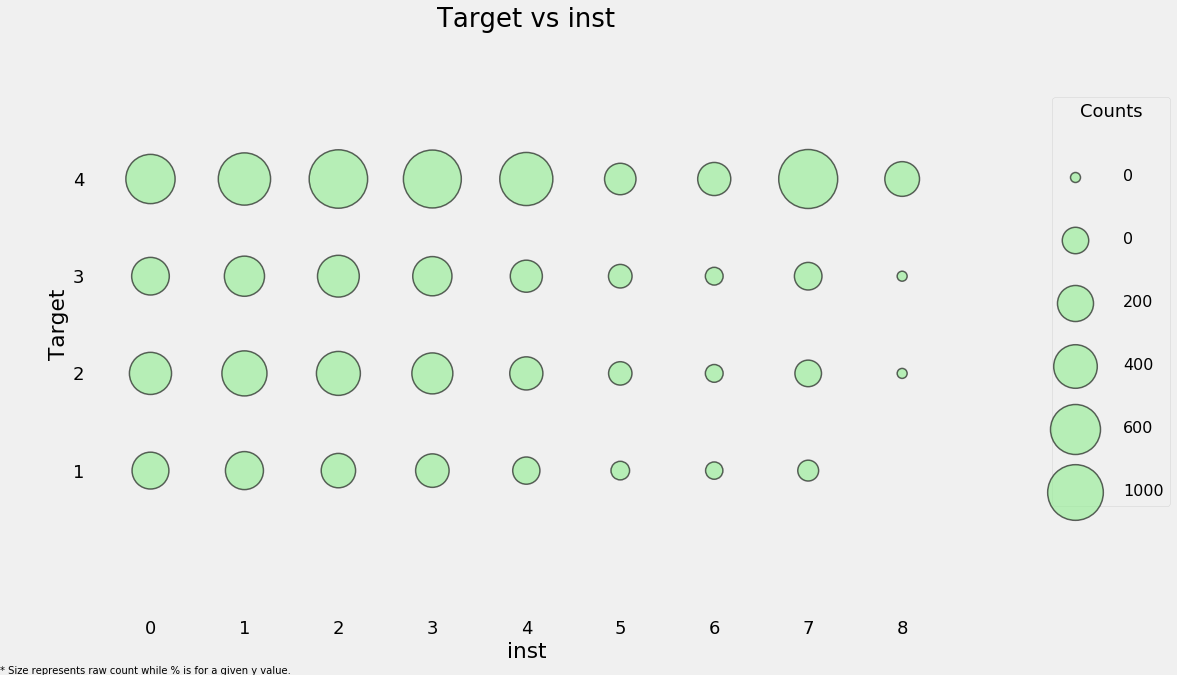

In [242]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)
plot_categoricals('inst', 'Target', ind, annotate = False)

Text(0.5, 1.0, 'Education Distribution by Target')

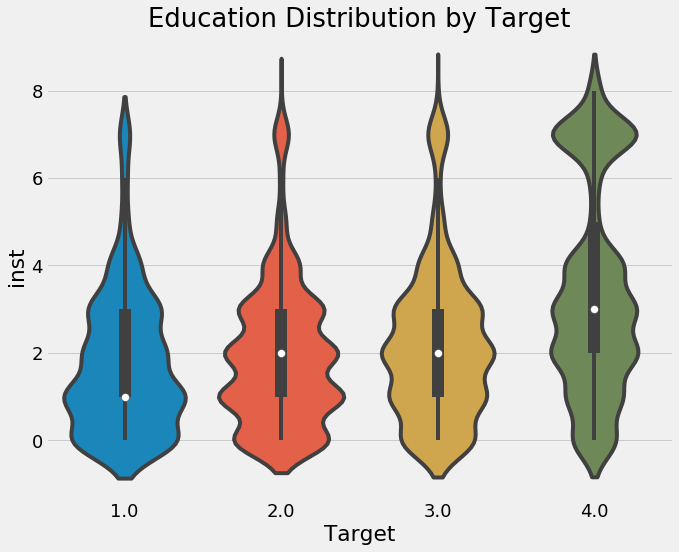

In [243]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data= ind)
plt.title('Education Distribution by Target')

In [244]:
ind.shape

(33413, 40)

<br>

### Feature Construction

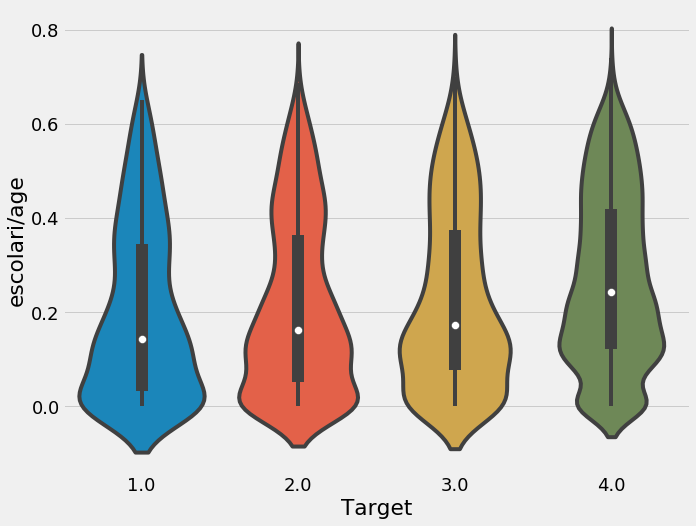

In [245]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data =ind)